In [1]:
import sys
sys.path.append("../")

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from cqiforecasting.configs.config import CFGLog
from cqiforecasting.dataloader.nn_data_loader import NNDataLoader
from cqiforecasting.utils.config import Config
from cqiforecasting.executor.inferer import Inferer
from sklearn.metrics import mean_absolute_error

In [3]:
data_loader = NNDataLoader(Config.from_json(CFGLog).data)

### LSTM Model

In [4]:
from cqiforecasting.models.lstm_model import LSTMModel

2023-10-22 18:28:46.074989: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-22 18:28:46.075029: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [5]:
BATCH_SIZE = 64
EPOCHS = 55

In [6]:
lstm_abs_errors = []

In [7]:
for i in range(1,81):
    print(f"=>Training with lag: {i}")
    X_train, X_val, X_test, y_train, y_val, y_test = data_loader.load_sequences(i, 1, scale=False)
    lstm_model = LSTMModel(i, CFGLog)
    lstm_model.build()
    lstm_model.load_data()
    history = lstm_model.train(BATCH_SIZE, EPOCHS, verbose=False)
    predictions = Inferer.infer(lstm_model._model, X_test)
    lstm_abs_errors.append(mean_absolute_error(predictions, y_test))

=>Training with lag: 1


2023-10-22 18:28:47.632039: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2023-10-22 18:28:47.632093: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ozi-Lenovo-Y50-70): /proc/driver/nvidia/version does not exist
2023-10-22 18:28:47.632556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(539, 1, 1)
17/17 [==============================] - 0s 2ms/step
=>Training with lag: 2
(538, 2, 1)
17/17 [==============================] - 0s 2ms/step
=>Training with lag: 3
(537, 3, 1)
17/17 [==============================] - 0s 2ms/step
=>Training with lag: 4
(536, 4, 1)
17/17 [==============================] - 0s 2ms/step
=>Training with lag: 5
(535, 5, 1)
17/17 [==============================] - 0s 2ms/step
=>Training with lag: 6
(534, 6, 1)
17/17 [==============================] - 0s 3ms/step
=>Training with lag: 7
(533, 7, 1)
17/17 [==============================] - 0s 3ms/step
=>Training with lag: 8
(532, 8, 1)
17/17 [==============================] - 0s 3ms/step
=>Training with lag: 9
(531, 9, 1)
17/17 [==============================] - 0s 3ms/step
=>Training with lag: 10
(530, 10, 1)
17/17 [==============================] - 0s 3ms/step
=>Training with lag: 11
(529, 11, 1)
17/17 [==============================] - 1s 4ms/step
=>Training with lag: 12
(528, 12, 1)
17/17 [=======

KeyboardInterrupt: 

In [8]:
lstm_abs_errors

[2.256327311492807,
 2.10858631488559,
 2.1402905746545207,
 2.135955457367114,
 2.0726975004249644,
 2.0761964017532293,
 2.0511760640099617,
 2.0592112110969714,
 2.0324497833539312,
 2.078070590181171,
 2.0387384868975174,
 2.0688168460672554,
 2.019142690148254,
 2.0371162220552392,
 2.0448078391665505,
 2.040940461267952,
 2.0356882097160383,
 2.054356365825025,
 2.0901540675684953,
 2.0150349140167236,
 2.0586715093697197,
 2.2160081706912362,
 2.0202241322058083,
 2.040892234144285,
 2.042517666677827,
 1.9922491038355845,
 2.0018495472318714,
 1.9794373204931617,
 1.988099502257405,
 2.0407113262251313,
 2.0399341217895386,
 2.023883480725326,
 1.9758547673799112,
 2.0741955536627485,
 2.0198166205151247,
 1.9623621087225656,
 2.0295550742632824,
 2.0317811282032516,
 2.0186337967832646,
 2.0288488969802856,
 2.0621279666801255,
 1.9840514133254208,
 2.0107756687601808,
 1.9713997600540039,
 2.0012183025629833,
 2.014388451209435,
 1.9441415301201068,
 1.984732639498827,
 2.039

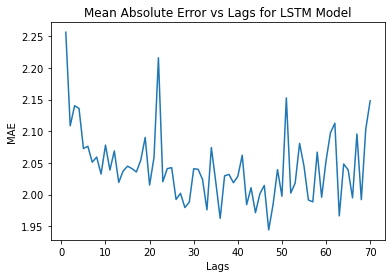

In [15]:
plt.plot([i for i in range(1,71)],lstm_abs_errors[:70])
plt.title("Mean Absolute Error vs Lags for LSTM Model")
plt.xlabel("Lags")
plt.ylabel("MAE");

In [16]:
pd.DataFrame({"MAE":lstm_abs_errors}).to_csv("../output/exported_models/models/lstm_lags_MAEs.csv")

### Bi-lstm model

In [ ]:
from cqiforecasting.models.bi_lstm_model import BiLSTMModel

In [ ]:
BATCH_SIZE = 64
EPOCHS = 55

In [ ]:
bi_lstm_abs_errors = []

In [ ]:
for i in range(1,61):
    X_train, X_val, X_test, y_train, y_val, y_test = data_loader.load_sequences(i, 1, scale=False)
    bi_lstm_model = BiLSTMModel(i, CFGLog)
    bi_lstm_model.build()
    bi_lstm_model.load_data()
    history = bi_lstm_model.train(BATCH_SIZE, EPOCHS)
    predictions = Inferer.infer(bi_lstm_model._model, X_test)
    bi_lstm_abs_errors.append(mean_absolute_error(predictions, y_test))